In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# English Property Prices Data Analysis

## Summary

The aim of this report is to carry out various data/ trend analysis tasks on property price data for England, available for the period between 01 September 2016 and 01 Aug 2019. The original data (available as 'average-property-price.csv') will be split into two data frames: one containing regional data (9 regions in England), and one containing area data (151 areas in England). The price trends will be investigated for both these data frames for specific property types: Flat and Detached properties for regional data, and Flats only for area data.

The report is divided into four sections:

1. Section 1: Data preparation 
    1. Loading the data
    1. Creating region and area data
    1. Missing values
1. Section 2: Flat and Detached property price trends for English regions
1. Section 3: Flat price change trends for all English areas
    1. Calculating change in price
    1. Visualisation of change in price
1. Section 4: Chi-Square analysis
1. Section 5: Appendix (for interest only)

## Section 1: Data Preparation

### Section 1A: Loading the data
Data is loaded into the 'property_prices' dataframe using 'average-property-price.csv' data file. A new column called 'Date_' is created from the original 'Date' column: the new column has the correct data type (datetime). The original 'Date' column is then dropped from the dataframe resulting in:

In [2]:
#loading the data
property_prices = pd.read_csv('average-property-price.csv')
#Create new column called Date_ from Date with the datatype datetime, and drop the original Date column
property_prices = property_prices.assign(Date_ = pd.to_datetime(property_prices['Date'], dayfirst=True)).drop(labels='Date', axis=1)
print('property_prices dataframe and info:')
display(property_prices)
display(property_prices.info())

property_prices dataframe and info:


,Area,Code,Detached,Semi,Terraced,Flat,Date_
0,Hartlepool,E06000001,179323.3934,108357.4457,77192.90613,62078.20672,2016-09-01
1,Hartlepool,E06000001,178880.9745,107765.1346,76294.05974,61893.84174,2016-10-01
2,Hartlepool,E06000001,179855.0608,107886.9468,76066.73993,61909.33647,2016-11-01
3,Hartlepool,E06000001,182847.8194,109312.3743,77019.16134,62919.44401,2016-12-01
4,Hartlepool,E06000001,177454.1433,105828.3642,74522.27530,60770.80795,2017-01-01
...,...,...,...,...,...,...,...
5755,South West,E12000009,392886.0520,257833.8176,211378.14160,164580.13010,2019-04-01
5756,South West,E12000009,391955.4811,257312.3992,210797.91220,163699.89930,2019-05-01
5757,South West,E12000009,395661.8630,259252.6985,211065.78130,165268.33830,2019-06-01
5758,South West,E12000009,403181.9431,263254.4633,215997.91970,166733.18990,2019-07-01


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5760 entries, 0 to 5759
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Area      5760 non-null   object        
 1   Code      5760 non-null   object        
 2   Detached  5724 non-null   float64       
 3   Semi      5724 non-null   float64       
 4   Terraced  5740 non-null   float64       
 5   Flat      5760 non-null   float64       
 6   Date_     5760 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 315.1+ KB


None

### Section 1B: Creating region and area data
The property_prices dataframe is split to create region data and area data. For region data, all data from 'property_prices' where the 'Code' starts with 'E12' is copied into a new dataframe and is called 'region_data'. 'property_prices' is copied into a new dataframe called 'area_data' and the data that was copied to region_data is dropped from the 'area_data' dataframe. Thus, 'area_data' only contains property information for English areas and 'region_data' only contains property information for English regions.

In [3]:
#separate the above data set - one dataframe with only the regions, other with the rest

#Since 'Code' is of type object, convert into a vector string and perform vector operation to search for data where the code starts with E12 and copy that data
region_data = property_prices.loc[property_prices.Code.str.startswith('E12')].copy() 
print('Region data: ')
display(region_data)
#copy to new dataframe called area_data
area_data = property_prices.copy()
#drop the copied rows from area_data 
area_data.drop(index = region_data.index, inplace = True)
print('area_data dataframe:')
display(area_data)

Region data: 


,Area,Code,Detached,Semi,Terraced,Flat,Date_
5436,North East,E12000001,208117.1739,125683.3380,101385.68860,89361.51412,2016-09-01
5437,North East,E12000001,208519.1158,125464.3201,99998.54363,89716.48508,2016-10-01
5438,North East,E12000001,210555.4948,126082.1090,100433.81080,90065.71739,2016-11-01
5439,North East,E12000001,211728.7243,127186.0647,102150.75450,91195.50119,2016-12-01
5440,North East,E12000001,205942.7099,123088.4533,98112.30132,88170.43214,2017-01-01
...,...,...,...,...,...,...,...
5755,South West,E12000009,392886.0520,257833.8176,211378.14160,164580.13010,2019-04-01
5756,South West,E12000009,391955.4811,257312.3992,210797.91220,163699.89930,2019-05-01
5757,South West,E12000009,395661.8630,259252.6985,211065.78130,165268.33830,2019-06-01
5758,South West,E12000009,403181.9431,263254.4633,215997.91970,166733.18990,2019-07-01


area_data dataframe:


,Area,Code,Detached,Semi,Terraced,Flat,Date_
0,Hartlepool,E06000001,179323.3934,108357.4457,77192.90613,62078.20672,2016-09-01
1,Hartlepool,E06000001,178880.9745,107765.1346,76294.05974,61893.84174,2016-10-01
2,Hartlepool,E06000001,179855.0608,107886.9468,76066.73993,61909.33647,2016-11-01
3,Hartlepool,E06000001,182847.8194,109312.3743,77019.16134,62919.44401,2016-12-01
4,Hartlepool,E06000001,177454.1433,105828.3642,74522.27530,60770.80795,2017-01-01
...,...,...,...,...,...,...,...
5431,Worcestershire,E10000034,367609.8101,223579.8115,175790.42090,129009.66830,2019-04-01
5432,Worcestershire,E10000034,365271.8235,222863.2382,175373.24490,128117.93010,2019-05-01
5433,Worcestershire,E10000034,369772.6445,225435.2225,177094.03750,129593.06920,2019-06-01
5434,Worcestershire,E10000034,371129.2027,225763.4806,177371.34880,129684.34220,2019-07-01


The location codes csv files is loaded into the 'location_codes' dataframe:

In [4]:
location_codes = pd.read_csv('location-codes.csv')
display(location_codes)

,AuthorityCode,AuthorityName,RegionCode,RegionName
0,E06000001,Hartlepool,E12000001,North East
1,E06000002,Middlesbrough,E12000001,North East
2,E06000003,Redcar and Cleveland,E12000001,North East
3,E06000004,Stockton-on-Tees,E12000001,North East
4,E06000005,Darlington,E12000001,North East
...,...,...,...,...
149,E10000029,Suffolk,E12000006,East of England
150,E10000030,Surrey,E12000008,South East
151,E10000031,Warwickshire,E12000005,West Midlands
152,E10000032,West Sussex,E12000008,South East


The location code data is used to assign 'RegionName' column to 'area_data' dataframe. The lookup function in the below code cell assigns a region from the 'location_codes' dataframe to each row in 'area_data' based on the 'Code' in 'area_data' that's looked up. 

In [5]:
codes = location_codes.AuthorityCode.values #store all codes from location_codes
regions = location_codes.RegionName.values #store all regions from location_codes

region_dict = dict(zip(codes,regions)) #create dictionary with code:region data
#lookup function
def lookup(row):
    return region_dict[row]
#create RegionName column and apply lookup to store region names in area_data for each data point
area_data = area_data.assign(RegionName = area_data.Code.apply(lookup))
print("area_data dataframe after assigning regions:")
display(area_data)

area_data dataframe after assigning regions:


,Area,Code,Detached,Semi,Terraced,Flat,Date_,RegionName
0,Hartlepool,E06000001,179323.3934,108357.4457,77192.90613,62078.20672,2016-09-01,North East
1,Hartlepool,E06000001,178880.9745,107765.1346,76294.05974,61893.84174,2016-10-01,North East
2,Hartlepool,E06000001,179855.0608,107886.9468,76066.73993,61909.33647,2016-11-01,North East
3,Hartlepool,E06000001,182847.8194,109312.3743,77019.16134,62919.44401,2016-12-01,North East
4,Hartlepool,E06000001,177454.1433,105828.3642,74522.27530,60770.80795,2017-01-01,North East
...,...,...,...,...,...,...,...,...
5431,Worcestershire,E10000034,367609.8101,223579.8115,175790.42090,129009.66830,2019-04-01,West Midlands
5432,Worcestershire,E10000034,365271.8235,222863.2382,175373.24490,128117.93010,2019-05-01,West Midlands
5433,Worcestershire,E10000034,369772.6445,225435.2225,177094.03750,129593.06920,2019-06-01,West Midlands
5434,Worcestershire,E10000034,371129.2027,225763.4806,177371.34880,129684.34220,2019-07-01,West Midlands


### Section 1C: Missing values

Now that both 'region_data' and 'area_data' have been created, they need to be checked for missing values:

In [6]:
print('region_data info:')
display(region_data.info())
print('area_data info:')
display(area_data.info())

region_data info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 324 entries, 5436 to 5759
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Area      324 non-null    object        
 1   Code      324 non-null    object        
 2   Detached  324 non-null    float64       
 3   Semi      324 non-null    float64       
 4   Terraced  324 non-null    float64       
 5   Flat      324 non-null    float64       
 6   Date_     324 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 20.2+ KB


None

area_data info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5436 entries, 0 to 5435
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Area        5436 non-null   object        
 1   Code        5436 non-null   object        
 2   Detached    5400 non-null   float64       
 3   Semi        5400 non-null   float64       
 4   Terraced    5416 non-null   float64       
 5   Flat        5436 non-null   float64       
 6   Date_       5436 non-null   datetime64[ns]
 7   RegionName  5436 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(3)
memory usage: 382.2+ KB


None

As it can be seen from above, 'region_data' doesn't seem to have any missing values whereas the 'Detached', 'Semi', and 'Terraced' columns in 'area_data' all seem to have missing values. Displaying these and investigating them further:

In [7]:
area_data[area_data.isna().any(axis = 1)] #display missing value data

,Area,Code,Detached,Semi,Terraced,Flat,Date_,RegionName
3276,City of London,E09000001,NaN,NaN,1189233.714,777891.9778,2016-09-01,London
3277,City of London,E09000001,NaN,NaN,1195010.116,790055.2118,2016-10-01,London
3278,City of London,E09000001,NaN,NaN,1229507.612,815992.8991,2016-11-01,London
3279,City of London,E09000001,NaN,NaN,1217012.801,809149.8515,2016-12-01,London
3280,City of London,E09000001,NaN,NaN,1227434.570,817654.0898,2017-01-01,London
3281,City of London,E09000001,NaN,NaN,1189660.065,818093.5200,2017-02-01,London
3282,City of London,E09000001,NaN,NaN,1176573.144,851416.0699,2017-03-01,London
3283,City of London,E09000001,NaN,NaN,1238739.417,903551.8492,2017-04-01,London
3284,City of London,E09000001,NaN,NaN,1277795.874,937307.4240,2017-05-01,London
3285,City of London,E09000001,NaN,NaN,1174213.336,928316.5022,2017-06-01,London


From the above, it seems like the missing values are only in the 'City of London' area. There is no data for detached and semi properties, and terraced properties don't have any data from Jan 2018. Since the rest of the analysis using 'area_data' dataframe only needs 'Flat' data (where nothing is missing), the missing data/ columns will be kept in the dataframe for now and nothing will be done as it doesn't affect any of the analysis and is the easiest option. The columns may be dropped later on in the analysis if needed. 

## Section 2: Flat and Detached property price trends for English regions

The trends for flats and detached properties are looked at in this section. Displaying the region data for reference:

In [8]:
#use region-data to look at trends for flats and detached

region_data

,Area,Code,Detached,Semi,Terraced,Flat,Date_
5436,North East,E12000001,208117.1739,125683.3380,101385.68860,89361.51412,2016-09-01
5437,North East,E12000001,208519.1158,125464.3201,99998.54363,89716.48508,2016-10-01
5438,North East,E12000001,210555.4948,126082.1090,100433.81080,90065.71739,2016-11-01
5439,North East,E12000001,211728.7243,127186.0647,102150.75450,91195.50119,2016-12-01
5440,North East,E12000001,205942.7099,123088.4533,98112.30132,88170.43214,2017-01-01
...,...,...,...,...,...,...,...
5755,South West,E12000009,392886.0520,257833.8176,211378.14160,164580.13010,2019-04-01
5756,South West,E12000009,391955.4811,257312.3992,210797.91220,163699.89930,2019-05-01
5757,South West,E12000009,395661.8630,259252.6985,211065.78130,165268.33830,2019-06-01
5758,South West,E12000009,403181.9431,263254.4633,215997.91970,166733.18990,2019-07-01


The below shows a snapshot of the property prices for both flats and detached properties for all nine regions over the 36 months:

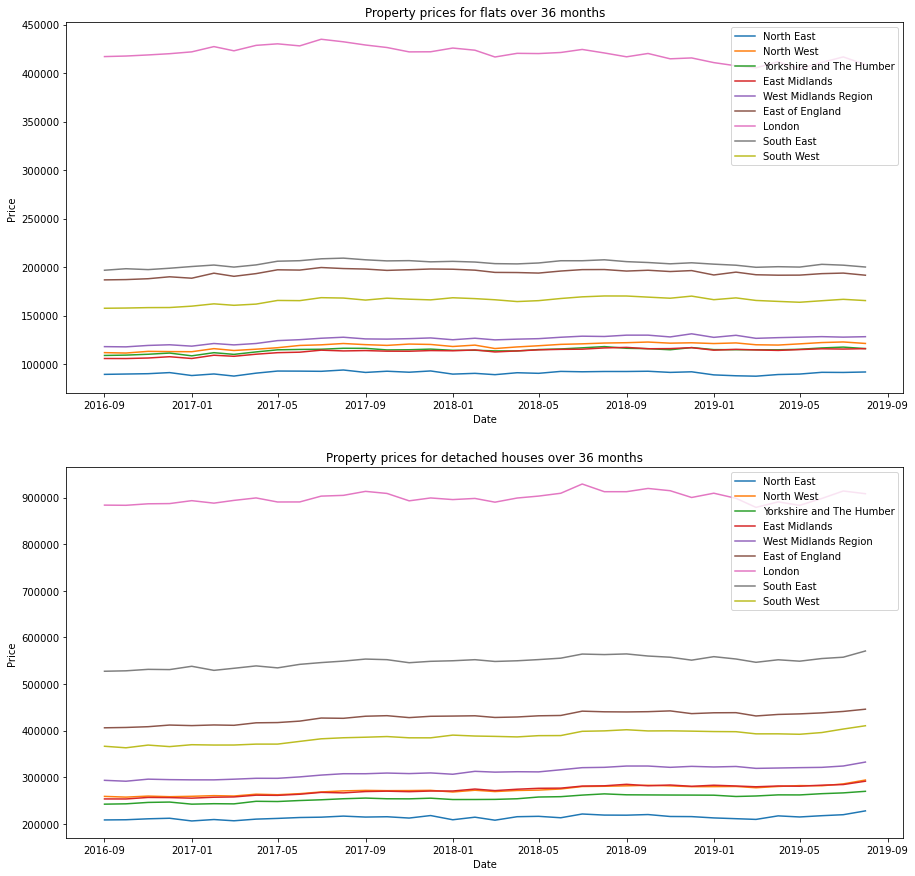

In [9]:
#normal comparisons - no scaling
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols =1 ,figsize = (15,15))

for area in region_data.Area.unique():
    ax1.plot(region_data[region_data.Area == area].Date_, region_data[region_data.Area == area].Flat, label = area)
    ax2.plot(region_data[region_data.Area == area].Date_, region_data[region_data.Area == area].Detached, label = area)

ax1.set_title('Property prices for flats over 36 months')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price')
ax1.legend(loc = 'best')

ax2.set_title('Property prices for detached houses over 36 months')
ax2.set_xlabel('Date')
ax2.set_ylabel('Price')
ax2.legend(loc = 'best')

While it's hard to spot trends easily due to the wide y-scale in both graphs, some initial inferences can still be made:
- London is the most expensive for both flats and detached properties, although there does seem to be a slight trend of the flat prices decreasing after a peak at around July 2017.
- South East, East, and South West are the next most expensive (in that order) after London. There seems to be a slight upward trend for detached houses for these regions. 
- North East is the most affordable region to buy both flats and detached properties and it seems to be flat on average over time.
- The rest of the regions (not covered above) all seem to be very similar to each other (for both flats and detached properties) but all of them seem to be exhibiting a slightly upward trend for both kinds of properties.

To visualise the overall trends better, and to be able to compare the general patterns for all the regions more effectively, the data was scaled (using min-max) and plotted as below:

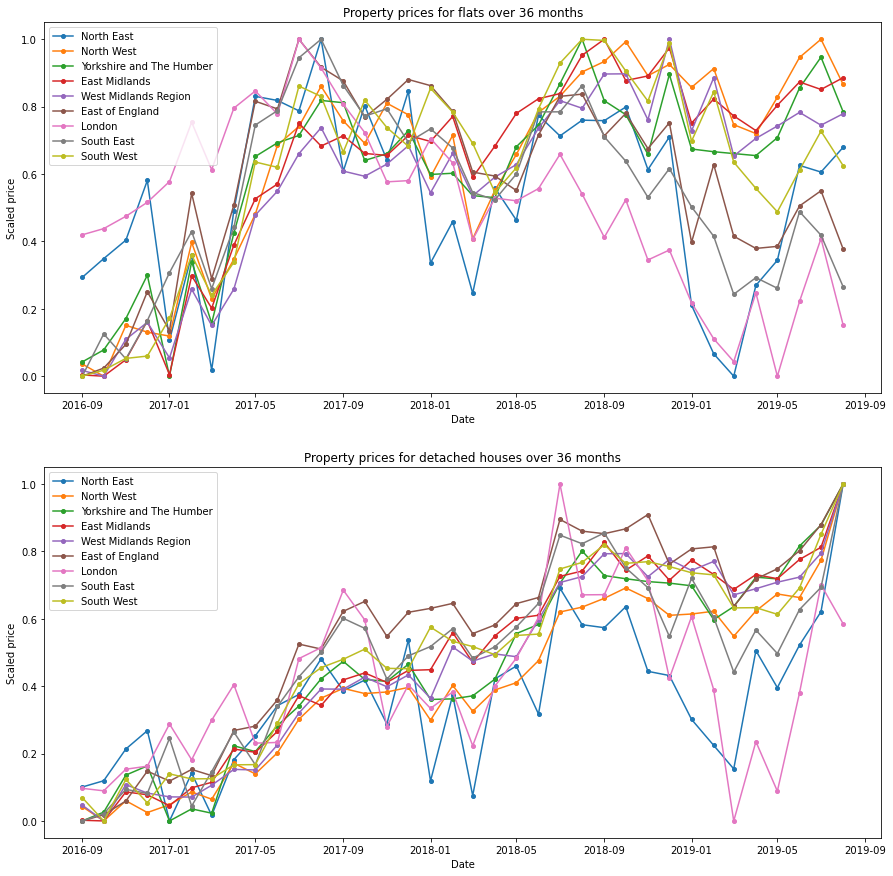

In [10]:
#min-max scaling
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols =1 ,figsize = (15,15))

#plot date against scaled value for each region
for area in region_data.Area.unique():
    ax1.plot(region_data[region_data.Area == area].Date_, (region_data[region_data.Area == area].Flat - region_data[region_data.Area == area].Flat.min())/ \
             (region_data[region_data.Area == area].Flat.max() - region_data[region_data.Area == area].Flat.min()), label = area, ls = '-', marker = 'o', ms = 4)
    ax2.plot(region_data[region_data.Area == area].Date_, (region_data[region_data.Area == area].Detached - region_data[region_data.Area == area].Detached.min())/ \
             (region_data[region_data.Area == area].Detached.max() - region_data[region_data.Area == area].Detached.min()), label = area, ls = '-', marker = 'o', ms = 4)

ax1.set_title('Property prices for flats over 36 months')
ax1.set_xlabel('Date')
ax1.set_ylabel('Scaled price')
ax1.legend(loc = 'best')

ax2.set_title('Property prices for detached houses over 36 months')
ax2.set_xlabel('Date')
ax2.set_ylabel('Scaled price')
ax2.legend(loc = 'best')

Please note that the y axis is scaled on both graphs above so no absolute price comparisons can be made. Also, the graphs are very cluttered and not useful for interrogating individual regions in a given time frame, but there are still some interesting overall observations that can be made:

For flats:

- All the regions apart from London and North East start very close to 0, i.e., close to the minimum prices for the respective region at the beginning of the graph (Sep 2016 - Oct 2016).
- There is a general upward trend for all the regions up until July - Aug 2017, following which there is a decline until March - May 2018. The decline was worst for North East.
- Following this, there is another upward trend until Aug 2018. London is the exception as although there is a slight peak in July 2018, the general trend for London is downwards.
- Following Aug 2018, there is another general downward trend but of varying degrees as the regions diverge considerably. London and North East seem to be affected the most.

For detached houses:

- All the regions follow a general upward pattern from September 2016 to around September 2018 with a bit of a flat period between September 2017 and May 2018. The North East experienced a major fluctuation during this flat period. 
- Following September 2018, there is a slight downward trend until Mar 2019 for almost all regions except London and North East which experience a major drop.
- Following this, all the regions trend upwards and all the regions except London climb to their highest price by Aug 2018.

To be able to analyse the trend for each region in greater detail, another set of plots is created below in an interactive tab. The user can flick through each region to understand the price trends for each region for both flats and detached properties. Please note again that as the y axis is scaled between 0 and 1, it's not possible to gauge any absolute prices from the below plots. The below graphs should not be used to compare flats and detached houses in an absolute sense. They should only be used to compare the general pattern exhibited by both, as well as to analyse the individual patterns and trends.

In [11]:
import ipywidgets as widgets

#create a tuple of the form ((0, North East),(1, North West),..,(8, South West)) to create tabs
tab_contents = tuple(zip(range(len(region_data.Area.unique())),list(region_data.Area.unique()))) 

#create output for each region
out_NE = widgets.Output()
out_NW = widgets.Output()
out_YH = widgets.Output()
out_EM = widgets.Output()
out_WM = widgets.Output()
out_EE = widgets.Output()
out_Lon = widgets.Output()
out_SE = widgets.Output()
out_SW = widgets.Output()

#store all the outputs in a list to be iterable
outs = [out_NE, out_NW, out_YH, out_EM, out_WM, out_EE, out_Lon, out_SE, out_SW]

#initialise tabs and and set titles
tab = widgets.Tab(outs)
[tab.set_title(i, region) for i, region in tab_contents]

# plot the data within each tab
#the below is the same code as for the plot before this (i.e. min-max scaled per region) but the flat and detached data is shown in one plot for each region
for i, region in tab_contents:
    with outs[i]:
        fig, ax = plt.subplots(figsize = (12,8))        
        ax.plot(region_data[region_data.Area == region].Date_, (region_data[region_data.Area == region].Flat - region_data[region_data.Area == region].Flat.min())/ \
             (region_data[region_data.Area == region].Flat.max() - region_data[region_data.Area == region].Flat.min()), label = 'Flat', ls = '-', marker = 'o', ms = 4)
        ax.plot(region_data[region_data.Area == region].Date_, (region_data[region_data.Area == region].Detached - region_data[region_data.Area == region].Detached.min())/ \
             (region_data[region_data.Area == region].Detached.max() - region_data[region_data.Area == region].Detached.min()), label = 'Detached', ls = '-', marker = 'o', ms = 4)
        ax.legend()
        plt.show()

tab

- From the above set of plots, in general, it seems that flats and detached houses follow similar patterns over time (i.e., peaks and troughs occur in tandem). 
- With the exception of London and North East, there is general upward trend of property prices for all regions over the full period upon which the data is plotted.
- North East has clear periods per year where the prices go up (spring/summer), stay stable (summer/autumn), and then come down again (autumn/winter). In general, the average seems to be around the middle throughout the period.
- London has had a general downward trend in flat prices after July 2017. The detached prices peaked in July 2018 but fell rapidly to the lowest ever in March 2019. There does seem to be some sign of recovery following May 2019. 

## Section 3: Flat price change trends for all English areas

### Section 3A: Calculating change in price
This section will calculate the change in price for flats between July 2017 and July 2018 for each area using the 'area_data' dataframe.  As a reference the data looks like below:

In [12]:
area_data

,Area,Code,Detached,Semi,Terraced,Flat,Date_,RegionName
0,Hartlepool,E06000001,179323.3934,108357.4457,77192.90613,62078.20672,2016-09-01,North East
1,Hartlepool,E06000001,178880.9745,107765.1346,76294.05974,61893.84174,2016-10-01,North East
2,Hartlepool,E06000001,179855.0608,107886.9468,76066.73993,61909.33647,2016-11-01,North East
3,Hartlepool,E06000001,182847.8194,109312.3743,77019.16134,62919.44401,2016-12-01,North East
4,Hartlepool,E06000001,177454.1433,105828.3642,74522.27530,60770.80795,2017-01-01,North East
...,...,...,...,...,...,...,...,...
5431,Worcestershire,E10000034,367609.8101,223579.8115,175790.42090,129009.66830,2019-04-01,West Midlands
5432,Worcestershire,E10000034,365271.8235,222863.2382,175373.24490,128117.93010,2019-05-01,West Midlands
5433,Worcestershire,E10000034,369772.6445,225435.2225,177094.03750,129593.06920,2019-06-01,West Midlands
5434,Worcestershire,E10000034,371129.2027,225763.4806,177371.34880,129684.34220,2019-07-01,West Midlands


The above data is used to create two subsets: one containing flat data where the date is 01/07/2017, and other containing flat data for the date 01/07/2018. This is so that the price difference can be calculated easily. The two subsets are shown below:

In [13]:
# create 2017 and 2018 'flat' dataframes, drop unnecessary columns, and set Area to be the index
df_2017 = area_data.loc[(area_data.Date_ == '2017-07-01')].copy().drop(columns = ['Detached','Semi','Terraced']).copy().set_index('Area')
df_2018 = area_data.loc[(area_data.Date_ == '2018-07-01')].copy().drop(columns = ['Detached','Semi','Terraced']).copy().set_index('Area')
print('df_2017 (flat data for 01/07/2017): ')
display(df_2017)
print('df_2018 (flat data for 01/07/2018): ')
display(df_2018)

df_2017 (flat data for 01/07/2017): 


,Code,Flat,Date_,RegionName
Area,,,,
Hartlepool,E06000001,65007.84170,2017-07-01,North East
Middlesbrough,E06000002,69163.06963,2017-07-01,North East
Redcar and Cleveland,E06000003,65507.80990,2017-07-01,North East
Stockton-on-Tees,E06000004,83599.32806,2017-07-01,North East
Darlington,E06000005,87041.37973,2017-07-01,North East
...,...,...,...,...
Suffolk,E10000029,140278.18370,2017-07-01,East of England
Surrey,E10000030,270116.52610,2017-07-01,South East
Warwickshire,E10000031,165676.94800,2017-07-01,West Midlands


df_2018 (flat data for 01/07/2018): 


,Code,Flat,Date_,RegionName
Area,,,,
Hartlepool,E06000001,61116.82158,2018-07-01,North East
Middlesbrough,E06000002,69313.90788,2018-07-01,North East
Redcar and Cleveland,E06000003,64802.79724,2018-07-01,North East
Stockton-on-Tees,E06000004,83654.55272,2018-07-01,North East
Darlington,E06000005,83679.31818,2018-07-01,North East
...,...,...,...,...
Suffolk,E10000029,142488.46480,2018-07-01,East of England
Surrey,E10000030,267144.69100,2018-07-01,South East
Warwickshire,E10000031,167470.71860,2018-07-01,West Midlands


The price change (% difference) is calculated by subtracting the price of flat in 2017 from the price in 2018 for a given area and then dividing it by the price in 2017. A new dataframe called 'df' is created that consists of the 'Area' as the index, and 'Code', 'RegionName', and 'Price_change' as the columns. This dataframe is shown below:

In [14]:
df = df_2018.copy().assign(Price_change = (df_2018.Flat - df_2017.Flat) *100/df_2017.Flat).drop(columns = ['Flat', 'Date_']) #assign price_change column and drop Flat and Date_
df

,Code,RegionName,Price_change
Area,,,
Hartlepool,E06000001,North East,-5.985463
Middlesbrough,E06000002,North East,0.218091
Redcar and Cleveland,E06000003,North East,-1.076227
Stockton-on-Tees,E06000004,North East,0.066059
Darlington,E06000005,North East,-3.862601
...,...,...,...
Suffolk,E10000029,East of England,1.575641
Surrey,E10000030,South East,-1.100205
Warwickshire,E10000031,West Midlands,1.082692


### Section 3B: Visualisation of change in price

To be able to plot a meaningful visualisation for the above, the 'df' dataframe above is first pivoted into a multi-index table with 'RegionName' as the first index level, 'Area' as the next index level, and 'Price_change' as the column for this pivoted table. The values in 'Price_change' are then sorted for each region in the pivot table. The new 'df_pivot' dataframe is shown below: 

In [15]:
df_pivot = df.pivot_table(index = ['RegionName','Area'], values = 'Price_change', aggfunc = 'sum') #create multi index pivot table
df_pivot = df_pivot.sort_values(['RegionName','Price_change'], ascending = [1,1]) #sort values by price_change and RegionName
df_pivot

Price_change
RegionName               Area                                    
East Midlands            City of Derby                   0.800656
                         Rutland                         1.108025
                         Lincolnshire                    1.285171
                         City of Nottingham              1.318686
                         Nottinghamshire                 1.826886
...                                                           ...
Yorkshire and The Humber City of Kingston upon Hull      0.718741
                         Leeds                           1.215613
                         Rotherham                       2.632623
                         Sheffield                       2.814313
                         Barnsley                        3.770739

[151 rows x 1 columns]

The above table is plotted for each region below:

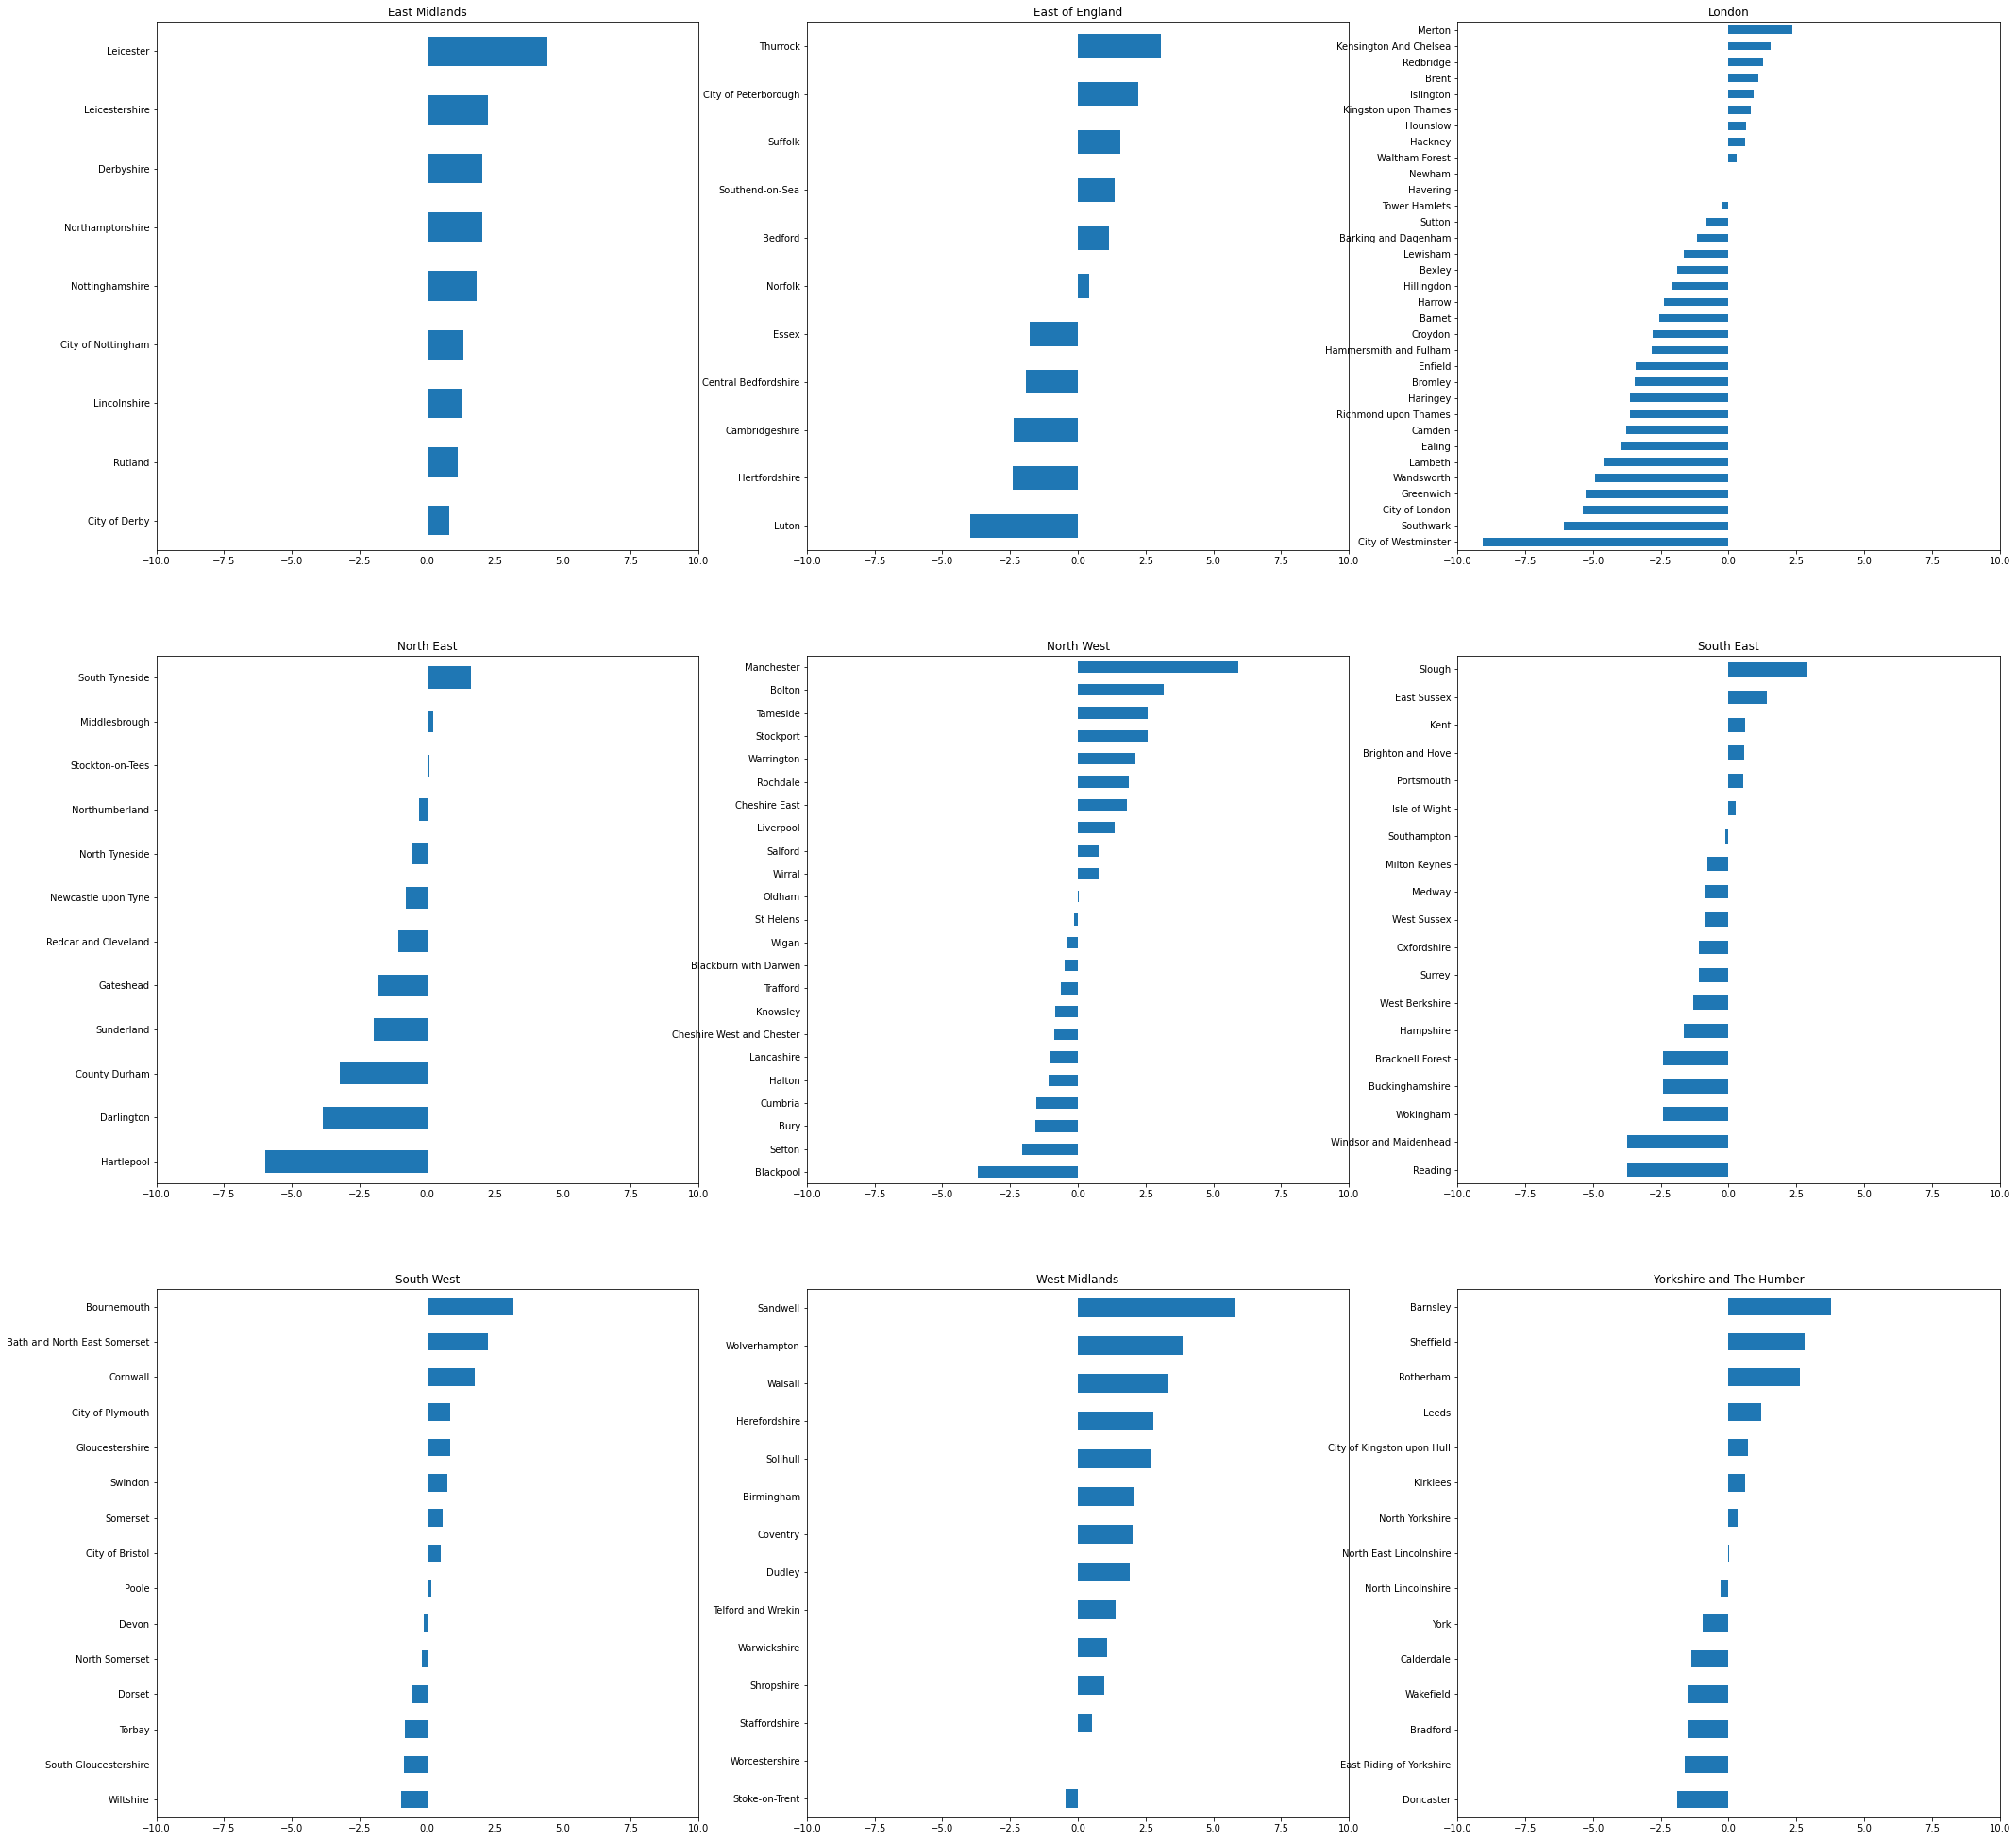

In [16]:
fig, a = plt.subplots(3,3, figsize = (35,35))
for ax, reg in zip(a.flat, df_pivot.index.levels[0]): 
    df_pivot.xs(reg).plot(kind='barh', ax=ax, xlabel ='', legend = False, title = reg, xlim = (-10,10), sharex = False)

From the above, it can be seen that between July 2017 and July 2018, East Midlands was the only region where all the areas experienced a price rise for flats. West Midlands also experienced a price rise in almost all areas except for two. Majority of areas in London and North East experienced a reduction in flat prices. The City of Westminster in London had the highest percentage price drop over the year. Manchester in North West and Sandwell in West Midlands seem to have experienced the biggest percentage price rise. 

<b> For an alternative visualisation, that is more interactive, see Section 5 (Appendix). </b>

## Section 4: Chi-Square analysis

From the above analysis of price changes of flats in all areas across all regions of England, a chi square hypothesis test can be performed to determine if the change in price has affected all regions similarly.

$H_0$ (null hypothesis): There is no difference in the change in price between different regions<br>
$H_1$ (alternative hypothesis): There is a difference in change in price between different regions

To carry out the hypothesis testing, the 'df' dataframe containing the Price_change will be used. For reference, the dataframe looks like this:

In [17]:
df

,Code,RegionName,Price_change
Area,,,
Hartlepool,E06000001,North East,-5.985463
Middlesbrough,E06000002,North East,0.218091
Redcar and Cleveland,E06000003,North East,-1.076227
Stockton-on-Tees,E06000004,North East,0.066059
Darlington,E06000005,North East,-3.862601
...,...,...,...
Suffolk,E10000029,East of England,1.575641
Surrey,E10000030,South East,-1.100205
Warwickshire,E10000031,West Midlands,1.082692


A new column is added to indicate if the price increased or decreased by comparing the value of 'Price_change' to 0. Then, columns 'Code', and 'Price_change' are dropped, and the resulting dataframe is stored as 'df_chi' (shown below):

In [18]:
# assign a new column called change_description that holds the values 'increase' or 'decrease' based on price_change comparisons with 0. Then drop Code and Price_change columns
df_chi = df.assign(Change_description = np.where(df.Price_change > 0, 'Increase', 'Decrease')).drop(columns = ['Code','Price_change'])
df_chi

,RegionName,Change_description
Area,,
Hartlepool,North East,Decrease
Middlesbrough,North East,Increase
Redcar and Cleveland,North East,Decrease
Stockton-on-Tees,North East,Increase
Darlington,North East,Decrease
...,...,...
Suffolk,East of England,Increase
Surrey,South East,Decrease
Warwickshire,West Midlands,Increase


The 'df_chi' table is cross tabulated such that the index is the region name, the columns are 'Increase' and 'Decrease', and the values in the table are the number of areas within the corresponding region that had a price increase or price decrease between July 2017 and July 2018. This table is shown below:

In [19]:
df_chi = pd.crosstab(df_chi.RegionName, [df_chi.Change_description]) # create crosstab
df_chi

Change_description,Decrease,Increase
RegionName,,
East Midlands,0,9
East of England,5,6
London,23,10
North East,9,3
North West,12,11
South East,13,6
South West,6,9
West Midlands,2,12
Yorkshire and The Humber,7,8


The chi square test is performed below:

In [20]:
test_stat, p_value, dof, expected = stats.chi2_contingency(df_chi, correction=False)

print('There are %d degrees of freedom' % dof)
print('The chi-squared test statistic is %4.2f' % test_stat)
print('The p-value is %4.3f %%' % (100 * p_value))


There are 8 degrees of freedom
The chi-squared test statistic is 27.60
The p-value is 0.056 %


The degrees of freedom is calculated by multiplying the (number of rows - 1) by the (number of columns - 1). The chi square test statistic is 27.6 and the p-value is 0.056%. This means that for a chi square distribution with 8 degrees of freedom, the probability of getting a value as extreme as 27.6 is 0.056%. Thus, there is statistical evidence to reject the null hypothesis.

Note that the above doesn't indicate which regions are more correlated with the change in price, or what kind of change is associated with what region, or the size of the change and it's practical significance. The low p-value only indicates the probability that there is a difference that cannot be associated with random chance. 

## Section 5: Appendix (for interest only)

This section creates an alternative interactive visualisation to the one shown in Section 3B. The below code will display an interactive (zoom, pan, hover) map of the UK with the areas superimposed. A heat map is used over the areas to indicate the change in price for each area. Hovering over an area results in the Area code, Area name, and Price change value to be displayed. This visualisation is good to get an instant view of the regions and areas where there has been a significant change in price as the user's eyes are naturally drawn to the darker colours. 

Please note that due to discrepancy between the codes provided in the data set used in the report and the codes used by the source (Office of National Statistics), there are 5 missing areas in England that are not displayed. These may be investigated in more detail and rectified in the future but have been left blank here for now.

Also, please note that it is assumed that this notebook is run in an environment where the geopandas and folium packages are not installed. The below two code cells run an installation routine to do so, and hence the output from those routines is inevitable (can't be hidden) and should be ignored. 

In [21]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [22]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [23]:
import geopandas as gpd
import json
import folium

#Source: https://geoportal.statistics.gov.uk/datasets/counties-and-unitary-authorities-may-2021-uk-buc/explore?location=51.672241%2C0.139431%2C8.00&showTable=true
#download geojson data containing UK NUTS Level 3 coordinates etc.
area_geo = 'https://opendata.arcgis.com/datasets/69109c4fbbc54f1f9d6e18000031a5fd_0.geojson'
df_geoJSON = gpd.read_file(area_geo)

#rename column CTYUA21CD to Code to enable merging
df_geoJSON = df_geoJSON.rename(columns = {'CTYUA21CD':'Code'})

#merge with df
merged_df_for_hover = df_geoJSON.merge(df, on = "Code")

#plot map
f = folium.Figure(width=15, height=15)
m = folium.Map(location=[55,5],
               zoom_control=True,
               scrollWheelZoom=True,
               dragging=True,
               max_bounds = True
              )
m.fit_bounds([[50, -6], [56, 1.7]])
m.choropleth(
    geo_data=area_geo,
    data=df,
    columns=['Code', 'Price_change'],
    key_on='feature.properties.CTYUA21CD',
    fill_color='RdYlBu',
    fill_opacity=0.9,
    line_opacity=0.5,
    legend_name='Price changes (%) for flats between 01/07/17 and 01/07/18',
    highlight=True)


#below code has been copied from https://towardsdatascience.com/how-to-step-up-your-folium-choropleth-map-skills-17cf6de7c6fe
# Add hover functionality.
style_function = lambda x: {'fillColor': '#ffffff', 
                            'color':'#000000', 
                            'fillOpacity': 0.1, 
                            'weight': 0.1}
highlight_function = lambda x: {'fillColor': '#000000', 
                                'color':'#000000', 
                                'fillOpacity': 0.50, 
                                'weight': 0.1}
area_name = folium.features.GeoJson(
    data = merged_df_for_hover,
    style_function=style_function, 
    control=False,
    highlight_function=highlight_function, 
    tooltip=folium.features.GeoJsonTooltip(
        fields=['CTYUA21NM', 'Code', 'Price_change'],
        aliases=['CTYUA21NM', 'Code', 'Price_change'],
        style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;") 
    )
)
m.add_child(area_name)
m.keep_in_front(area_name)

m

/opt/conda/lib/python3.9/site-packages/folium/folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(
